In [1]:
import csv
import geopandas as gpd
import pandas as pd
import shapely
from matplotlib.pyplot import figure
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
objects = ['neighborhoods',
           'census_income_data',
           'ids',
           'date',
           'ptype',
           'category',
           'location',
           'arrest',
           'community_area',
           'geometry',
           'crime_data',
           'crimes']

for thing in objects:
    try:
        del thing
    except NameError as e:
        print("Couldn't delete {0}".format(thing))
        print(e)
        continue


del neighborhoods
del census_income_data
del ids
del date
del ptype
del category
del location
del arrest
del community_area
del geometry
del crime_data
del crimes

In [3]:
neighborhoods = gpd.read_file('community-areas.geojson')
census_income_data = gpd.read_file('census-tracts-2000.geojson')

In [4]:
def getx(pt):
    return pt.coords[0][0]

def gety(pt):
    return pt.coords[0][1]

ids = []
date = []
ptype = []
desc = []
locdesc = []
arrest = []
community_area = []
geometry = []

In [5]:
ids = []
date = []
ptype = []
category = []
#desc = []
location = []
arrest = []
community_area = []
geometry = []

In [6]:
categories: dict = {"THEFT": "property",
                    "BURGLARY": "property",
                    "MOTOR VEHICLE THEFT": "property",
                    "ARSON": "property",
                    "CRIMINAL DAMAGE": "property",
                    "ROBBERY": "property",
                    "ASSAULT": "person",
                    "BATTERY": "person",
                    "CRIM SEXUAL ASSAULT": "person",
                    "HOMICIDE": "person",
                    "INTIMIDATION": "person",
                    "KIDNAPPING": "person",
                    "OFFENSE INVOLVING CHILDREN": "person",
                    "SEX OFFENSE": "person",
                    "STALKING": "person",
                    "GAMBLING": "vice",
                    "NARCOTICS": "vice",
                    "PROSTITUTION": "vice",
                    "LIQUOR LAW VIOLATION": "vice",
                    "OBSCENITY": "vice",
                    "OTHER NARCOTIC VIOLATION": "vice",
                    "PUBLIC INDECENCY": "vice",
                    "OTHER OFFENSE": "other",
                    "DECEPTIVE PRACTICE": "other",
                    "WEAPONS VIOLATION": "other",
                    "PUBLIC PEACE VIOLATION": "other",
                    "CRIMINAL TRESPASS": "other",
                    "INTERFERENCE WITH PUBLIC OFFICER": "other",
                    "NON-CRIMINAL": "other"
                   }

In [7]:
chunkfiles: list = ['crimes-2010-2011-0.csv', 'crimes-2010-2011-1.csv']

min_lat = 45.
max_lat = 41.
min_lon = -91.
max_lon = -91.

for chunk in chunkfiles:
    with open(chunk, "r") as crimes_fh:
        crimereader = csv.reader(crimes_fh)
        for row in crimereader:
            try:
                lat = float(row[19])
                if lat == 36.619446395:
                    continue
                lon = float(row[20])
                if lat < min_lat:
                    min_lat = lat
                    print("Min lat found[{0}]: {1}x{2}".format(row[0], lat, lon))
                if lat > max_lat:
                    max_lat = lat
                    print("Max lat found[{0}]: {1}x{2}".format(row[0], lat, lon))
                if lon < min_lon:
                    min_lon = lon
                    print("Min lon found[{0}]: {1}x{2}".format(row[0], lat, lon))
                if lon > max_lon:
                    max_lon = lon
                    print("Max lon found[{0}]: {1}x{2}".format(row[0], lat, lon))
            except Exception as e:
                continue
            ids.append(row[0])
            date.append(row[2].split(" ")[0])
            ptype.append(row[5])
            category.append(categories[row[5]])
            location.append(row[7])
            arrest.append(row[8])
            community_area.append(row[9])
            geometry.append(shapely.geometry.point.Point(lon, lat))

Min lat found[8265244]: 41.95396528x-87.771918163
Max lat found[8265244]: 41.95396528x-87.771918163
Max lon found[8265244]: 41.95396528x-87.771918163
Max lat found[4991465]: 42.001678618x-87.660604177
Max lon found[4991465]: 42.001678618x-87.660604177
Min lat found[5147738]: 41.802219519x-87.663439163
Max lon found[5281401]: 41.802238398x-87.613918511
Min lat found[11020229]: 41.701867053x-87.530451675
Max lon found[11020229]: 41.701867053x-87.530451675
Max lat found[7291823]: 42.00676766x-87.673597598
Min lat found[7331615]: 41.700687359x-87.619500705
Max lat found[7602316]: 42.011970273x-87.688015969
Min lat found[7871698]: 41.677507979x-87.663130735
Min lat found[8371884]: 41.649491211x-87.53989848
Max lat found[7610940]: 42.017691576x-87.673002618
Max lat found[7611932]: 42.020009355x-87.669489875
Max lon found[7616725]: 41.702034731x-87.526963434
Min lat found[7617540]: 41.645835887x-87.614600077
Max lat found[7622324]: 42.02152431x-87.6718957
Max lat found[7626378]: 42.021675231x

In [8]:
print("Min lat: {0}; Max lat: {1}; Min lon: {2}; Max lon: {3}".format(min_lat, max_lat, min_lon, max_lon))

Min lat: 41.644589713; Max lat: 42.022548774; Min lon: -91.0; Max lon: -87.524529378


for chunk in chunkfiles:
    with open(chunk, "r") as crimes_fh:
        crimereader = csv.reader(fh)
        for row in crimereader:
            if "IUCR" in row or '"(41' not in row:
                # Ignore the header row and rows missing GPS coordinates
                continue
            else:
                row = row.replace(',,',',<empty>,').replace(')"','').rstrip()
                row = row.lstrip('"(')
                fields = row.split(',')
                ids.append(fields[0])
                date.append(fields[2].split(' ')[0])
                ptype.append(fields[5])
                desc.append(fields[6])
                locdesc.append(fields[7])
                arrest.append(fields[8])
                community_area.append(fields[9])
                lat = float(fields[-3].lstrip('"('))
                lon = float(fields[-4].rstrip(')"'))
                geometry.append(shapely.geometry.point.Point(lat, lon))

In [9]:
crime_data = {
        'date': pd.Series(date, index=ids),
        "primary type": pd.Series(ptype, index=ids, dtype="category"),
        "category": pd.Series(category, index=ids, dtype="category"),
        "location description": pd.Series(location, index=ids),
        "arrest": pd.Series(arrest, index=ids),
        "community area": pd.Series(community_area, index=ids),
        "geometry": pd.Series(geometry, index=ids)
        }

data = {
        'date': pd.Series(date, index=ids),
        "primary type": pd.Series(ptype, index=ids),
        "description": pd.Series(desc, index=ids),
        "location description": pd.Series(locdesc, index=ids),
        "arrest": pd.Series(arrest, index=ids),
        "community area": pd.Series(community_area, index=ids),
        "geometry": pd.Series(geometry, index=ids)
        }

In [10]:
crimes = gpd.GeoDataFrame(crime_data, index=ids)

In [11]:
print(crimes.info())
print(crimes['primary type'].unique())
print(crimes['category'].unique())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 721337 entries, 8265244 to 8198043
Data columns (total 7 columns):
date                    721337 non-null object
primary type            721337 non-null category
category                721337 non-null category
location description    721337 non-null object
arrest                  721337 non-null object
community area          721337 non-null object
geometry                721337 non-null object
dtypes: category(2), object(5)
memory usage: 34.4+ MB
None
[BURGLARY, DECEPTIVE PRACTICE, OFFENSE INVOLVING CHILDREN, OTHER OFFENSE, CRIM SEXUAL ASSAULT, ..., OBSCENITY, OTHER NARCOTIC VIOLATION, PUBLIC INDECENCY, HOMICIDE, NON-CRIMINAL]
Length: 29
Categories (29, object): [BURGLARY, DECEPTIVE PRACTICE, OFFENSE INVOLVING CHILDREN, OTHER OFFENSE, ..., OTHER NARCOTIC VIOLATION, PUBLIC INDECENCY, HOMICIDE, NON-CRIMINAL]
[property, other, person, vice]
Categories (4, object): [property, other, person, vice]


crimes["ptype"].loc[lambda t: t == 'ARSON']

crimes = gpd.GeoDataFrame(data, index=ids)
print(crimes['primary type'].unique())

categories: dict = {"THEFT": "property",
                    "BURGLARY": "property",
                    "MOTOR VEHICLE THEFT": "property",
                    "ARSON": "property",
                    "CRIMINAL DAMAGE": "property",
                    "ROBBERY": "property",
                    "ASSAULT": "person",
                    "BATTERY": "person",
                    "CRIM SEXUAL ASSAULT": "person",
                    "HOMICIDE": "person",
                    "INTIMIDATION": "person",
                    "KIDNAPPING": "person",
                    "OFFENSE INVOLVING CHILDREN": "person",
                    "SEX OFFENSE": "person",
                    "STALKING": "person",
                    "GAMBLING": "vice",
                    "NARCOTICS": "vice",
                    "PROSTITUTION": "vice",
                    "LIQUOR LAW VIOLATION": "vice",
                    "OBSCENITY": "vice",
                    "OTHER NARCOTIC VIOLATION": "vice",
                    "PUBLIC INDECENCY": "vice",
                    "OTHER OFFENSE": "other",
                    "DECEPTIVE PRACTICE": "other",
                    "WEAPONS VIOLATION": "other",
                    "PUBLIC PEACE VIOLATION": "other",
                    "CRIMINAL TRESPASS": "other",
                    "INTERFERENCE WITH PUBLIC OFFICER": "other",
                    "NON-CRIMINAL": "other"
                   }
crimes["ptype"] = crimes["primary type"].astype("category")
crimes["category"] = pd.Series([categories[ptype] for ptype in crimes["ptype"]]).astype("category")
crimes.head()

Potential slices:
* Property (burglary, theft, robbery, etc.)
* Bodily (sexual assault, sex offense, battery, assault, kidnapping, etc.)
* Vice (gambling, prostitution, liquor law, narcotics, etc.)

Potential coding:
* define method that takes a line of text (an array of parsed fields?) and the name of the bucket and appends the fields to the right place

In [12]:
x = list(crimes.geometry.apply(getx))
y = list(crimes.geometry.apply(gety))
heatmap, xedges, yedges = np.histogram2d(y, x, bins=(100, 100))
extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

In [13]:
logheatmap = np.log(heatmap)
logheatmap[np.isneginf(logheatmap)] = 0
logheatmap = ndimage.filters.gaussian_filter(logheatmap, 1, mode='nearest')

/Users/jon/anaconda3/envs/geospatial/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


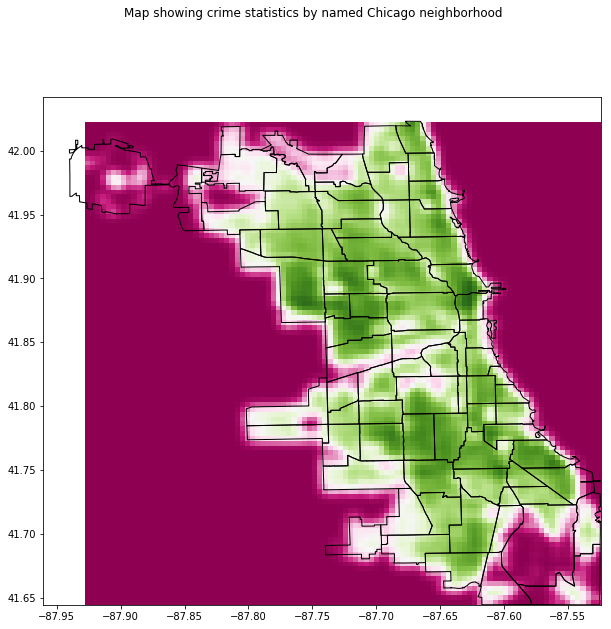

In [14]:
fig, ax = plt.subplots()
fig.suptitle('Map showing crime statistics by named Chicago neighborhood')
ax.set_aspect('equal')
fig.set_size_inches(10,10)

plt.imshow(logheatmap, cmap="PiYG", extent=extent)
plt.gca().invert_yaxis()
neighborhoods.plot(ax=ax, edgecolor='black', color='none')
plt.show()

I don't understand it. If I have the pyplot figure variable named fig, everything works as expected.

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax3 = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 100)
Y = np.arange(0, 100)
X, Y = np.meshgrid(X, Y)
Z = logheatmap
print(Z.min())
print(Z.max())

# Plot the surface.
surf = ax3.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.5)

# Customize the z axis.
ax3.set_zlim(-4, 7)
ax3.zaxis.set_major_locator(LinearLocator(10))
ax3.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

But renaming it from fig to fig3, and leaving everything else the same, the plot breaks.

fig3 = plt.figure()
ax = fig.gca(projection='3d')
print(type(ax))
ax3 = fig.gca(projection='3d')
print(type(ax3))

# Make data.
X = np.arange(0, 100)
Y = np.arange(0, 100)
X, Y = np.meshgrid(X, Y)
Z = logheatmap
print(Z.min())
print(Z.max())

# Plot the surface.
surf = ax3.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=.5)

# Customize the z axis.
ax3.set_zlim(-4, 7)
ax3.zaxis.set_major_locator(LinearLocator(10))
ax3.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig3.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [15]:
with open("sorted-census-tract-median-household-income.csv", "r") as tract_income:
    tract_income_list = list(csv.DictReader(tract_income))

In [16]:
tract_info_df = pd.DataFrame(tract_income_list)
with_incomes = pd.merge(census_income_data, tract_info_df, on="census_tra")

In [17]:
print(with_incomes.info())
#print(with_incomes['geometry'].head)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 878 entries, 0 to 877
Data columns (total 19 columns):
tract_cens      878 non-null object
tract_fips      878 non-null object
shape_area      878 non-null object
perimeter       878 non-null object
tract_cent      878 non-null object
census_t_1      878 non-null object
tract_numa      878 non-null object
tract_comm      878 non-null object
objectid        878 non-null object
tract_cr_1      0 non-null object
data_admin      878 non-null object
tract_ce_1      878 non-null object
census_tra      878 non-null object
tract_ce_3      878 non-null object
tract_crea      878 non-null object
tract_ce_2      878 non-null object
shape_len       878 non-null object
geometry        878 non-null object
income_range    878 non-null object
dtypes: object(19)
memory usage: 137.2+ KB
None


[0 1 2 3 4 5]


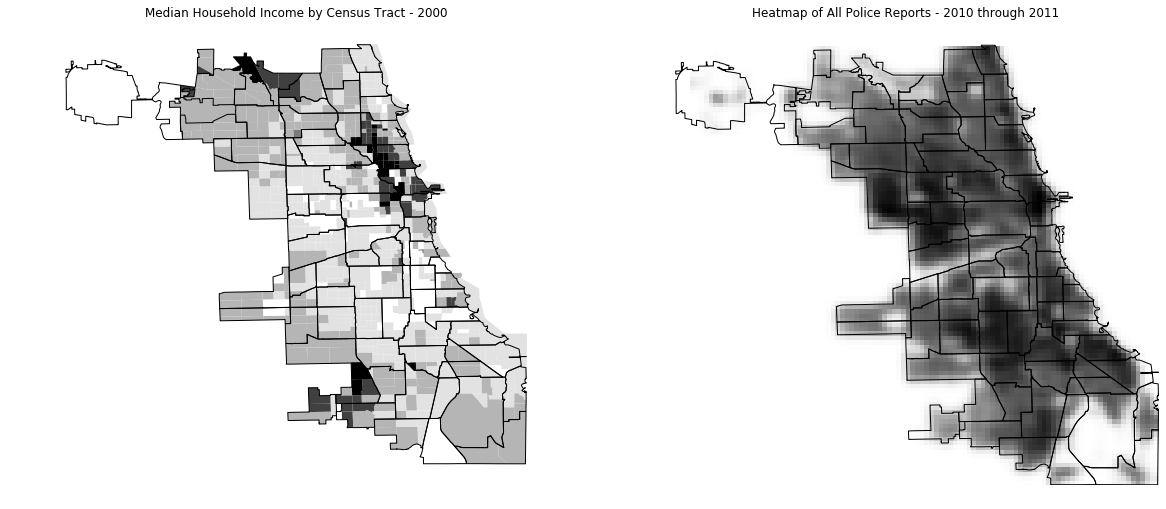

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib
from matplotlib.ticker import MaxNLocator

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 20))

income_ranges = np.array(["",
                          "$0      - $20,000",
                          "$20,001 - $40,000",
                          "$40,001 - $60,000",
                          "$60,001 - $80,000",
                          "$80,001 +"
                         ])

ax.set_aspect('equal')
ax.set_title('Median Household Income by Census Tract - 2000')
ax.axis("off")

#cMap = ListedColormap(["#333333", "#555555", "#999999", "#BBBBBB", "#EEEEEE"])
cMap = plt.get_cmap('Greys')
print(cMap)

levels = np.linspace(0, 5, 6, dtype=int)
print(levels)

norm = matplotlib.colors.BoundaryNorm(levels, ncolors=cMap.N, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: income_ranges[::-1][norm(x)])

#wi_plot = with_incomes.plot(ax=ax, column="income_range",  cmap=cMap, legend=True)
with_incomes.plot(ax=ax, column="income_range",  cmap=cMap)
#cb1 = matplotlib.colorbar.ColorbarBase(cmap="Greys",
#                                       norm=norm,
#                                       orientation='horizontal', ax=ax)
neighborhoods.plot(ax=ax, edgecolor='black', color='none')

ax2.set_aspect('equal')
ax2.set_title('Heatmap of All Police Reports - 2010 through 2011')
ax2.axis("off")
plt.imshow(logheatmap, cmap=cMap, extent=extent)
plt.gca().invert_yaxis()
neighborhoods.plot(ax=ax2, edgecolor='black', color='none')
plt.show()

#cb1 = matplotlib.colorbar.ColorbarBase(cmap="Greys",
#                                       norm=norm,
#                                       orientation='horizontal', ax=ax)
#cb1.set_label(income_ranges, fontsize=6)

cb1.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(income_ranges):
    cb1.ax.text(.5, (2 * j + 1) / 8.0, lab, ha='center', va='bottom')
cb1.ax.get_yaxis().labelpad = 15
cb1.ax.set_ylabel('Income Ranges') #, rotation=270)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(with_incomes.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(with_incomes.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

plt.tight_layout()


#bounds = np.linspace(0,6,5)
#cb = plt.colorbar(wi_plot, spacing='proportional', ticks=bounds)
#cb = plt.colorbar(ax=ax, spacing='proportional', ticks=bounds)
#cb.set_label('Custom cbar')
#ax.set_title('Discrete color mappings')


#plt.colorbar(ax=ax, format=fmt)

# add the colorbar to the figure
#cbar = fig.colorbar(sm, ax=ax)

for chunk in chunkfiles:
    with open(chunk, "r") as crimes_fh:
        for row in crimes_fh:
            if "IUCR" in row or '"(41' not in row:
                # Ignore the header row and rows missing GPS coordinates
                continue
            else:
                row = row.replace(',,',',<empty>,').replace(')"','').rstrip()
                row = row.lstrip('"(')
                fields = row.split(',')
                ids.append(fields[0])
                date.append(fields[2].split(' ')[0])
                ptype.append(fields[5])
                desc.append(fields[6])
                locdesc.append(fields[7])
                arrest.append(fields[8])
                community_area.append(fields[9])
                lat = float(fields[-3].lstrip('"('))
                lon = float(fields[-4].rstrip(')"'))
                geometry.append(shapely.geometry.point.Point(lat, lon))

data = {
        'date': pd.Series(date, index=ids),
        "primary type": pd.Series(ptype, index=ids),
        "description": pd.Series(desc, index=ids),
        "location description": pd.Series(locdesc, index=ids),
        "arrest": pd.Series(arrest, index=ids),
        "community area": pd.Series(community_area, index=ids),
        "geometry": pd.Series(geometry, index=ids)
        }

with open("Crimes-2010-2011.csv", "r") as fh:
    crimereader = csv.reader(fh)
    for row in crimereader:
        try:
            lat = float(row[19])
            lon = float(row[20])
        except Exception as e:
            continue
        ids.append(row[0])
        date.append(row[2].split(" ")[0])
        ptype.append(row[5])
        category.append(categories[row[5]])
        location.append(row[7])
        arrest.append(row[8])
        community_area.append(row[9])
        geometry.append(shapely.geometry.point.Point(lat, lon))